In [3]:
!pip install graphviz
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install jovian
!pip install wordcloud
!pip install emoji
!pip install seaborn
!pip install dateparser

  Using cached https://files.pythonhosted.org/packages/ef/99/53bd1ac9349262f59c1c421d8fcc2559ae8a5eeffed9202684756b648d33/tzlocal-2.0.0-py2.py3-none-any.whl


In [4]:
#Setting working directory
import os
path = 'E:\\PyCon'
os.chdir(path)
print(os.getcwd())

E:\PyCon


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# police.csv is Rhode Island dataset from stanford open
# policing project

In [8]:
# Load the dataset
ri = pd.read_csv('police.csv')
ri.sample(7)

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
81027,2014-09-25,16:02,NaN,M,1995.0,19.0,White,Seatbelt Violation,Seat belt,False,NaN,Citation,False,0-15 Min,False
43185,2010-06-18,14:26,NaN,M,1972.0,38.0,White,Special Detail/Directed Patrol,Other,False,NaN,Citation,False,0-15 Min,False
71975,2013-09-28,10:03,NaN,M,1958.0,55.0,Hispanic,Seatbelt Violation,Seat belt,False,NaN,Citation,False,0-15 Min,False
85348,2015-04-15,15:23,NaN,F,1990.0,25.0,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
52342,2011-09-09,07:44,NaN,M,1953.0,58.0,Black,Registration Violation,Registration/plates,False,NaN,Citation,False,0-15 Min,False
66114,2013-01-06,09:35,NaN,M,1968.0,45.0,Hispanic,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False
84936,2015-03-25,22:43,NaN,M,1992.0,23.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False


In [9]:
# pd.set_option('display_max_columns', 500)
pd.set_option('display.max_rows', 500)

In [10]:
ri.shape

(91741, 15)

In [11]:
ri.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [59]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
stop_date             91741 non-null object
stop_time             91741 non-null object
county_name           0 non-null float64
driver_gender         86406 non-null object
driver_age_raw        86414 non-null float64
driver_age            86120 non-null float64
driver_race           86408 non-null object
violation_raw         86408 non-null object
violation             86408 non-null object
search_conducted      91741 non-null bool
search_type           3196 non-null object
stop_outcome          86408 non-null object
is_arrested           86408 non-null object
stop_duration         86408 non-null object
drugs_related_stop    91741 non-null bool
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+ MB


In [17]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [25]:
len(ri.columns)

15

### Remove columns that only contains missing values

In [26]:
missing_list = ['county_name']

In [27]:
ri.drop(missing_list, axis = 1, inplace = True)

In [31]:
len(ri.columns)

15

In [40]:
# Another way to drop--
ri.dropna(axis = 1, how = 'all').shape

(91741, 14)

In [38]:
ri['county_name']

KeyError: 'county_name'

### Do Men or Women speed more ofter

In [41]:
ri.sample(9)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
41338,2010-03-28,09:47,F,1978.0,32.0,Hispanic,Registration Violation,Registration/plates,False,NaN,Citation,False,16-30 Min,False
63858,2012-09-21,15:54,M,1982.0,30.0,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
63839,2012-09-21,01:00,F,1989.0,23.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
37349,2009-09-16,12:55,M,1987.0,22.0,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,16-30 Min,False
49983,2011-06-03,12:10,M,1963.0,48.0,White,Speeding,Speeding,False,NaN,Citation,False,16-30 Min,False
12924,2006-12-19,16:07,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
31279,2008-12-23,23:54,M,1989.0,19.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
61046,2012-06-17,23:50,M,1988.0,24.0,Black,Other Traffic Violation,Moving violation,False,NaN,Arrest Driver,True,0-15 Min,False
46798,2010-12-23,01:21,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False


In [44]:
ri.violation.value_counts()

Speeding               48463
Moving violation       16224
Equipment              11020
Other                   4317
Registration/plates     3432
Seat belt               2952
Name: violation, dtype: int64

In [57]:
ri_speeding = ri[ri.violation == 'Speeding']

In [71]:
ri[ri.violation == 'Speeding'].driver_gender.value_counts(normalize = True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [72]:
ri[ri.driver_gender == 'M'].violation.value_counts(normalize=True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [76]:
ri.groupby('driver_gender').violation.value_counts(normalize = True).loc[:,'Speeding']

driver_gender
F    0.65850
M    0.52435
Name: violation, dtype: float64

In [77]:
ri.groupby('violation').driver_gender.value_counts(normalize = True)

violation            driver_gender
Equipment            M                0.774319
                     F                0.225681
Moving violation     M                0.802515
                     F                0.197485
Other                M                0.840167
                     F                0.159833
Registration/plates  M                0.704837
                     F                0.295163
Seat belt            M                0.784892
                     F                0.215108
Speeding             M                0.680527
                     F                0.319473
Name: driver_gender, dtype: float64

In [ ]:
# Downside
# ==> 1. we don't know how many men and women are driving
# ==> 2. We don't know how many km they drove.
# ==> 3. The time the time frequency of the violation.

In [78]:
ri.groupby('driver_gender').violation.value_counts(normalize = True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

In [79]:
type(ri.groupby('driver_gender').violation.value_counts(normalize = True))

pandas.core.series.Series

In [ ]:
ri.groupby('driver_gender').violation.value_counts(normalize = True).unstack()
# Now we could turn it into dataframe and find rows and cols

In [81]:
type(ri.groupby('driver_gender').violation.value_counts(normalize = True).unstack())

pandas.core.frame.DataFrame

## Does gender affect who gets searched during a stop?
 - driver_gender, search_conducted

In [95]:
ri.search_conducted.value_counts(normalize = True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [96]:
ri.search_conducted.mean()

0.03483720473942948

In [98]:
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

## Why is search type missing so often

In [105]:
ri.isna().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [111]:
ri.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [117]:
ri[ri.search_conducted == False].search_type.value_counts(dropna = False)

NaN    88545
Name: search_type, dtype: int64

In [118]:
ri.search_type.value_counts(dropna = False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Incident to Arrest,Protective Frisk                            33
Probable Cause,Protective Frisk                                33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Protective Frisk,Reasonable Suspicion                          11
Inventory,

## During a search how often a driver is frisked

In [123]:
ri[ri.search_conducted].search_type.str.contains('Frisk').value_counts('Protective Frisk')

False    0.914268
True     0.085732
Name: search_type, dtype: float64

In [130]:
ri['frisk'] = ri.search_type.str.contains('Protective Fris')

In [132]:
ri.frisk.value_counts(dropna = False)

NaN      88545
False     2922
True       274
Name: frisk, dtype: int64

In [133]:
ri.frisk.sum()

274

In [134]:
ri.frisk.mean()

0.08573216520650813

## Which year had the least number of stops

In [136]:
ri.sample()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk
77030,2014-04-27,19:23,NaN,M,1993.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN


In [140]:
ri.stop_date.str.slice(0,4).value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [79]:
combined = ri.stop_date.str.cat(ri.stop_time, sep = ' ')

In [80]:
combined.head()

0    2005-01-02 01:55
1    2005-01-18 08:15
2    2005-01-23 23:15
3    2005-02-20 17:15
4    2005-03-14 10:00
Name: stop_date, dtype: object

In [81]:
#Another way
pd.to_datetime(ri.stop_date)

0       2005-01-02
1       2005-01-18
2       2005-01-23
3       2005-02-20
4       2005-03-14
           ...    
91736   2015-12-31
91737   2015-12-31
91738   2015-12-31
91739   2015-12-31
91740   2015-12-31
Name: stop_date, Length: 91741, dtype: datetime64[ns]

In [82]:
ri['stop_datetime'] = pd.to_datetime(combined)

In [83]:
ri.stop_datetime.dt.year.value_counts().index[0]

2012

## How does drug activity change by time of day?
 - stop_date_time , drug_related_stop

In [103]:
ri.stop_datetime.dt.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_datetime, dtype: int64

In [104]:
ri.drugs_related_stop.mean()

0.008883705213590434

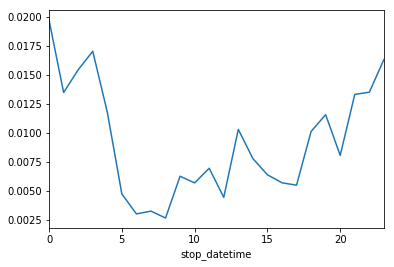

In [108]:
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

## Do most stops happen at night

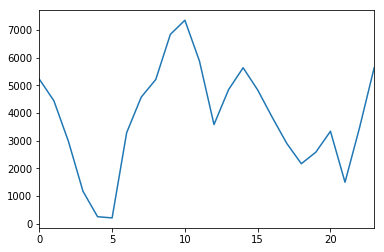

In [130]:
ri.stop_datetime.dt.hour.value_counts().sort_index().plot()

In [131]:
# or we may use it by groupby function
ri[(ri.stop_datetime.dt.hour > 5) & (ri.stop_datetime.dt.hour <22)].shape

(68365, 16)

In [134]:
# or we may use it by groupby function
ri[(ri.stop_datetime.dt.hour > 5) & (ri.stop_datetime.dt.hour <22)].shape

(68365, 16)

In [132]:
ri.shape

(91741, 16)

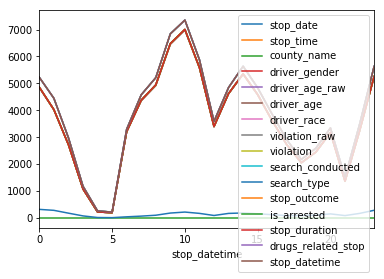

In [135]:
# Another way to look at it
ri.groupby(ri.stop_datetime.dt.hour).count().plot()

In [ ]:
# what is the problem with the above plot?
## ==> For any column that has no missing values, i'll
##    get the right plot but if we choose the column that has 
##    missing values then we get the above plot

### So let's check it with the stop_time that has no missing values

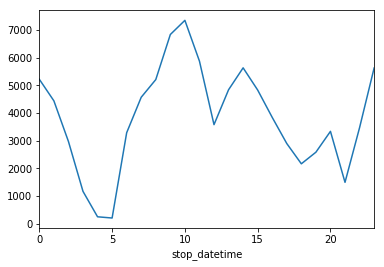

In [137]:
ri.groupby(ri.stop_datetime.dt.hour).stop_date.count().plot()

## Find the bad data in stop_duration column and fix it

In [143]:
ri.stop_duration.sort_values(ascending = False)

77301    30+ Min
52854    30+ Min
24765    30+ Min
64892    30+ Min
31443    30+ Min
          ...   
91637        NaN
91660        NaN
91674        NaN
91710        NaN
91713        NaN
Name: stop_duration, Length: 91741, dtype: object

In [145]:
ri.stop_duration.value_counts(dropna = False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [157]:
ri[(ri.stop_duration == '1') | (ri.stop_duration == '2')].stop_duration = 'NaN'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [153]:
ri.stop_date.dtype

dtype('O')

In [159]:
ri.stop_duration.value_counts(dropna = False)
# So nothing changed

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [161]:
# So the way to solve this issue is buy using the .loc value
ri.loc[(ri.stop_duration == '1') | (ri.stop_duration == '2'), 'stop_duration'] = 'NaN'

In [162]:
ri.stop_duration.value_counts(dropna = False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

#### Now it worked but we've just hit an ambiguity here. two Nan value...

In [163]:
import numpy as np

In [164]:
ri.loc[ri.stop_duration == 'NaN', 'stop_duration'] = np.nan

In [166]:
ri.stop_duration.value_counts(dropna = False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

In [4]:
# The numpy usage


ri['Suspected'] = np.where(ri['driver_age'] > 45, 'Not_a_Suspect', 'Suspect')

In [5]:
ri.Suspected.value_counts()

Suspect          74182
Not_a_Suspect    17559
Name: Suspected, dtype: int64

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [29]:
# Load the dataset
bh = pd.read_csv('BostonHousing.csv')
bh.head(7)

,crim column1 (cm),zn column2,indus column3,chas,nox (cm),rm column num32,age,dis (cm),rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [31]:
bh.columns

Index(['crim column1 (cm)', 'zn column2', 'indus column3', 'chas', 'nox (cm)',
       'rm column num32', 'age', 'dis (cm)', 'rad', 'tax', 'ptratio', 'b',
       'lstat', 'medv'],
      dtype='object')

In [19]:
bh.columns.str.replace(' ', '')

Index(['crimcolumn1', 'zncolumn2', 'induscolumn3', 'chas', 'nox',
       'rmcolumnnum32', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat',
       'medv'],
      dtype='object')

In [21]:
bh.columns.str.replace(' ', '_')

Index(['crim_column1', 'zn_column2', 'indus_column3', 'chas', 'nox',
       'rm_column_num32', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat',
       'medv'],
      dtype='object')

In [27]:
bh.columns.str.replace(' \(cm\)', '')

Index(['crim column1', 'zn column2', 'indus column3', 'chas', 'nox',
       'rm column num32', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat',
       'medv'],
      dtype='object')

In [44]:
bh.columns = bh.columns.str.replace(' \(cm\)', '').str.replace(' ', '_')

In [46]:
bh.columns

Index(['crim_column1', 'zn_column2', 'indus_column3', 'chas', 'nox',
       'rm_column_num32', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat',
       'medv'],
      dtype='object')

# Additional play

In [48]:
### just an another chunk of code

choices = ['pizza', 'pasta', 'salad', 'nachos']
for index, item in enumerate(choices, start = 1):
    print (index, item)
    

1 pizza
2 pasta
3 salad
4 nachos


In [50]:
for index, item in enumerate(choices, 1):
    print (index, item)
    

1 pizza
2 pasta
3 salad
4 nachos


In [52]:
for index, item in enumerate(choices):
    print (index + 1, item)

1 pizza
2 pasta
3 salad
4 nachos


In [61]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [62]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [66]:
!pip install sklearn.cross_validation

  Could not find a version that satisfies the requirement sklearn.cross_validation (from versions: )
No matching distribution found for sklearn.cross_validation


In [67]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [68]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [69]:
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

In [74]:
#Prediction
y_pred=clf.predict(x_test)
#convert into binary values
for i in range(0,99):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0

In [75]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [76]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)

ValueError: Classification metrics can't handle a mix of continuous and binary targets

# Pandas Merging, Joining, Concatenating

In [7]:
!pip install pandas

In [8]:
import pandas as pd

AttributeError: type object 'pandas._libs.tslibs.conversion._TSObject' has no attribute '__reduce_cython__'